## Exploration et analyses des données chronologiques des ventes afin de réaliser un modéle de prédiction

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Analyse exploratoire

**1 - Importation des données**

In [75]:
# importation des données
data = pd.read_excel("FAM FORECAST.xlsx")
df = pd.DataFrame(data)

In [76]:
# dévouverte de la forme des données
df.head()

,DATE,FAM 1,FAM 2,FAM 3,FAM 4,FAM 5,FAM 6
0,201001,1.109436e+07,3.758963e+06,1.315854e+06,772280.656029,1.803448e+05,1.672330e+06
1,201002,3.754209e+06,2.294199e+06,1.567287e+06,NaN,1.435516e+06,1.957590e+06
2,201003,5.892462e+06,2.246095e+05,9.323532e+05,64200.000000,4.656045e+06,3.809078e+06
3,201004,5.553461e+06,2.204361e+06,1.250791e+06,380741.353712,7.673226e+05,9.416443e+05
4,201005,1.257417e+07,1.656627e+06,9.278913e+05,153423.843725,1.471845e+06,7.880737e+05


In [77]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m')

**2 - Informations générales sur les données**

In [78]:
df.describe()

,FAM 1,FAM 2,FAM 3,FAM 4,FAM 5,FAM 6
count,1.440000e+02,1.440000e+02,1.440000e+02,1.310000e+02,1.440000e+02,1.440000e+02
mean,7.684697e+06,2.110235e+06,1.646512e+06,4.162338e+05,1.866533e+06,1.409090e+06
std,2.664613e+06,8.689699e+05,9.761805e+05,3.276785e+05,1.052458e+06,8.594072e+05
min,3.684956e+06,2.246095e+05,1.089200e+04,6.368000e+03,1.803448e+05,1.088354e+05
25%,5.738917e+06,1.504728e+06,1.059755e+06,1.339683e+05,1.104814e+06,8.159398e+05
50%,7.243749e+06,1.998536e+06,1.422386e+06,3.102361e+05,1.707228e+06,1.141558e+06
75%,8.910116e+06,2.588660e+06,2.043755e+06,6.207641e+05,2.340562e+06,1.986129e+06
max,1.980878e+07,5.830632e+06,5.531775e+06,1.207213e+06,5.814432e+06,3.809078e+06


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    144 non-null    datetime64[ns]
 1   FAM 1   144 non-null    float64       
 2   FAM 2   144 non-null    float64       
 3   FAM 3   144 non-null    float64       
 4   FAM 4   131 non-null    float64       
 5   FAM 5   144 non-null    float64       
 6   FAM 6   144 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 8.0 KB


**3 - Vérification des valeurs manquantes**

In [80]:
valeurs_manquantes = df.isnull().sum()
pourcentage_manquant = (valeurs_manquantes / len(df)) * 100
infos_manquantes = pd.DataFrame({'Valeurs Manquantes': valeurs_manquantes, 'Pourcentage': pourcentage_manquant})
print(infos_manquantes)

       Valeurs Manquantes  Pourcentage
DATE                    0     0.000000
FAM 1                   0     0.000000
FAM 2                   0     0.000000
FAM 3                   0     0.000000
FAM 4                  13     9.027778
FAM 5                   0     0.000000
FAM 6                   0     0.000000


In [81]:
# remplace les valeurs manquantes avec la valeur précédente
df["FAM 4"] = df["FAM 4"].fillna(method='ffill')
df.isnull().sum()

df["FAM 1"][""]

DATE     0
FAM 1    0
FAM 2    0
FAM 3    0
FAM 4    0
FAM 5    0
FAM 6    0
dtype: int64

**4 - Visualisation des Données**

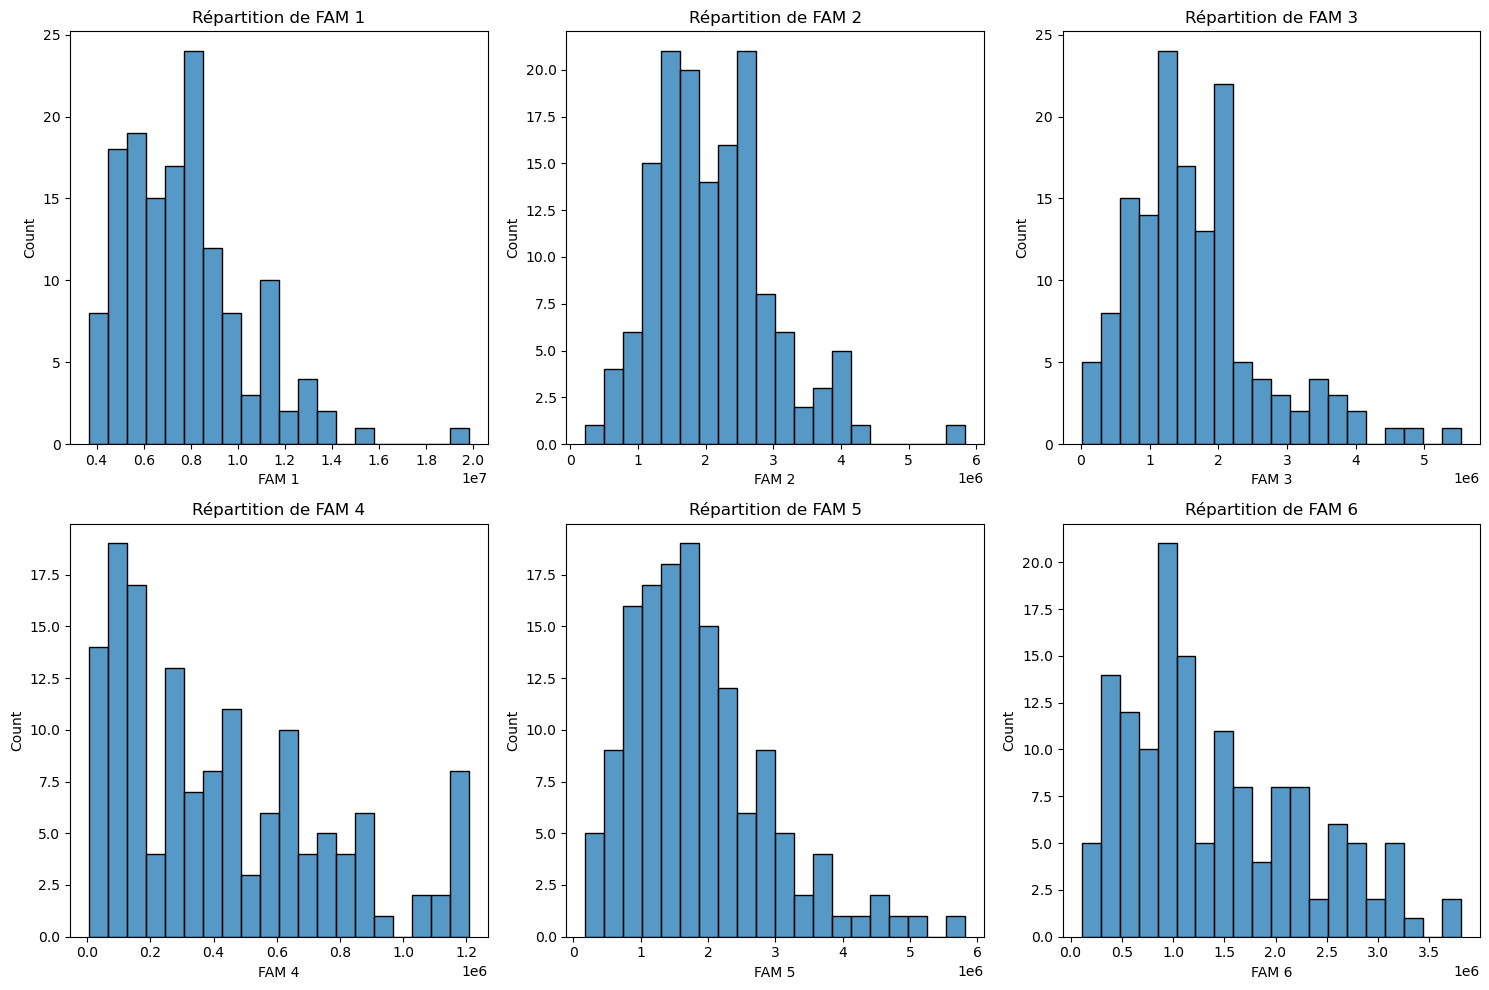

In [39]:
variables = ['FAM 1', 'FAM 2', 'FAM 3', 'FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=variable, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Répartition de {variable}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**4 - Analyse des Séries Temporelles**

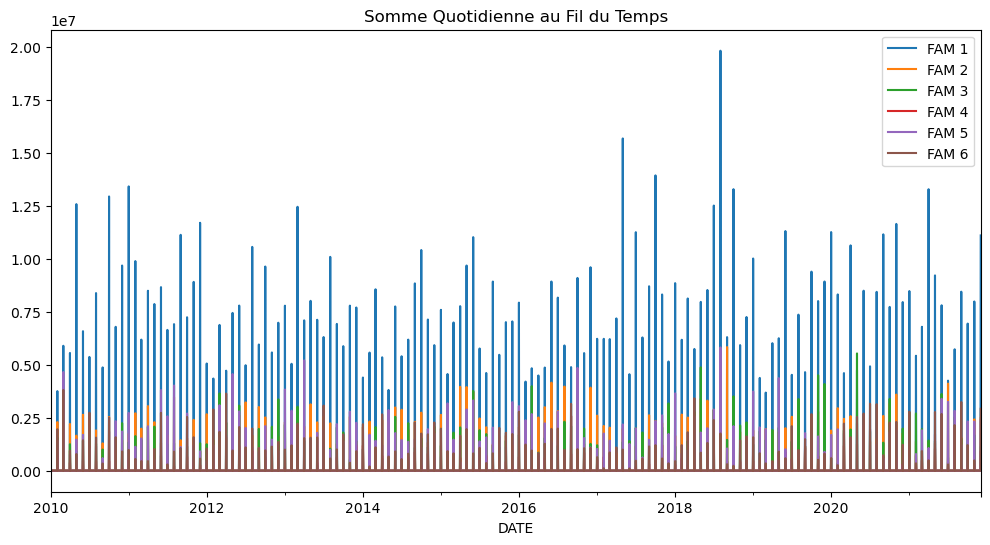

In [40]:
# En supposant que df a une colonne de dates 'timestamp'
df.set_index('DATE', inplace=True)
df.resample('D').sum().plot(figsize=(12, 6))
plt.title('Somme Quotidienne au Fil du Temps')
plt.show()

**5 - Exploration des Données Catégoriques**

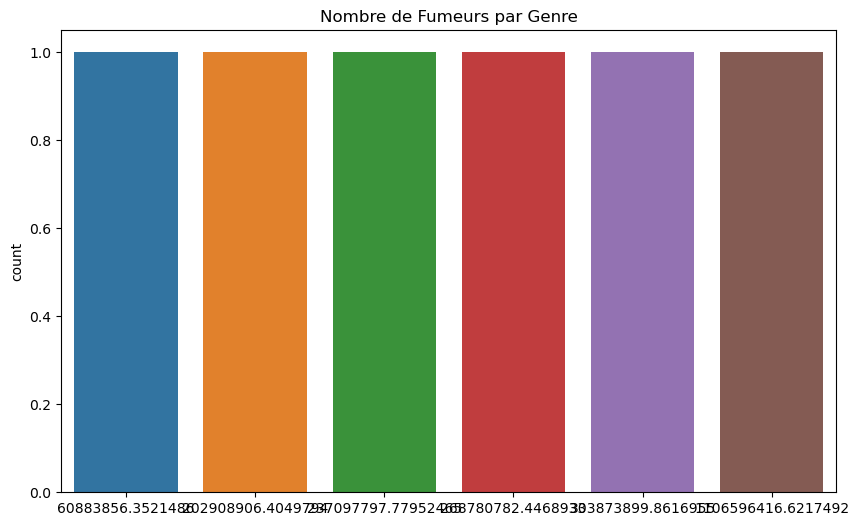

In [41]:
# Exemple : Diagramme en Barres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df.sum())
plt.title('Nombre de Fumeurs par Genre')
plt.show()

**6 - Détection des Valeurs Aberrantes**

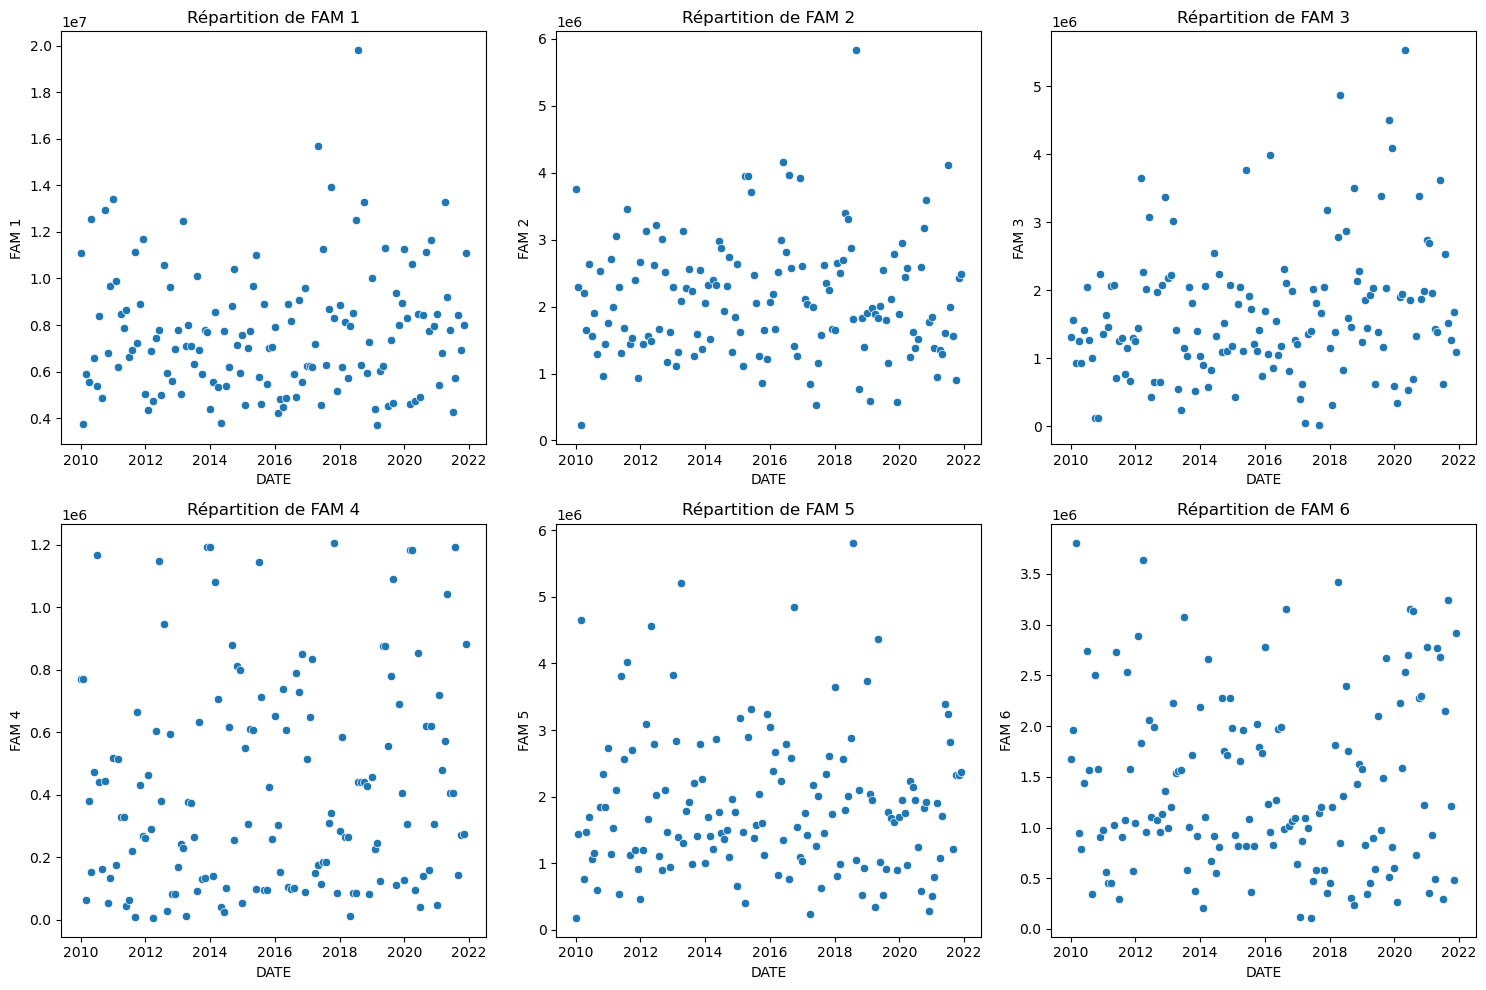

In [42]:
variables = ['FAM 1', 'FAM 2', 'FAM 3', 'FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df, x='DATE' , y=variable, ax=axes[row, col])
    axes[row, col].set_title(f'Répartition de {variable}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**7 - Evolution des ventes par famille**

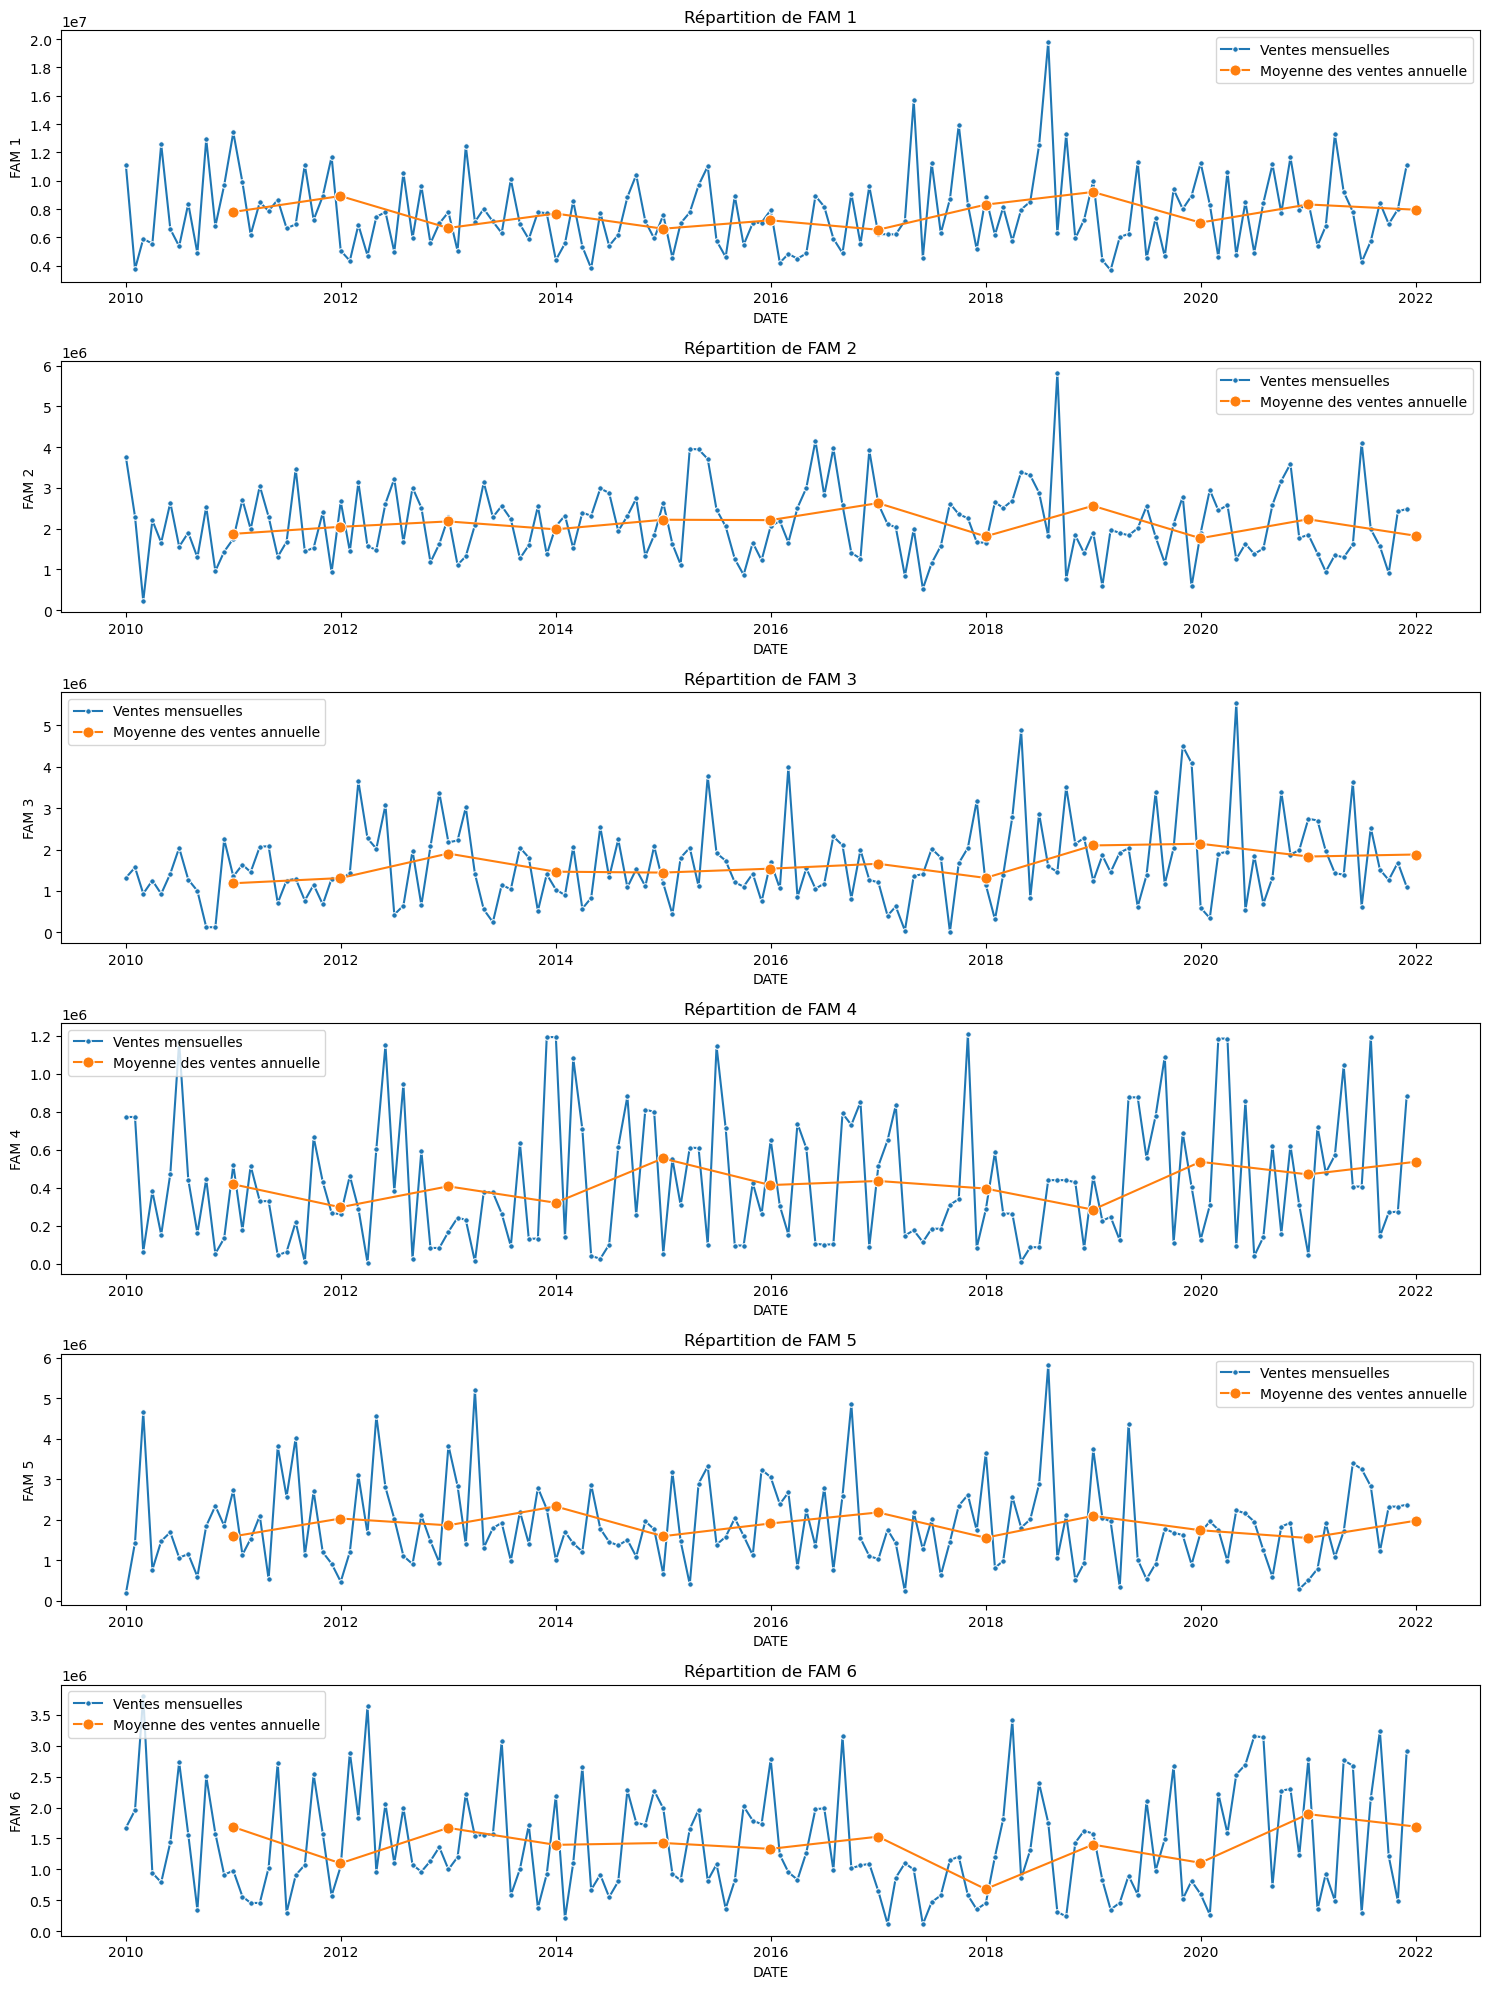

In [43]:
variables = ['FAM 1', 'FAM 2', 'FAM 3', 'FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    row = i 
    col = 1
    sns.lineplot(data=df, x='DATE' , y=variable, ax=axes[i],marker='o', markersize=4, linestyle='-', label='Ventes mensuelles')
    sns.lineplot(data=df[f"{variable}"].resample('Y').mean(), ax=axes[i],marker='o', markersize=8, linestyle='-', label='Moyenne des ventes annuelle')
    axes[i].set_title(f'Répartition de {variable}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

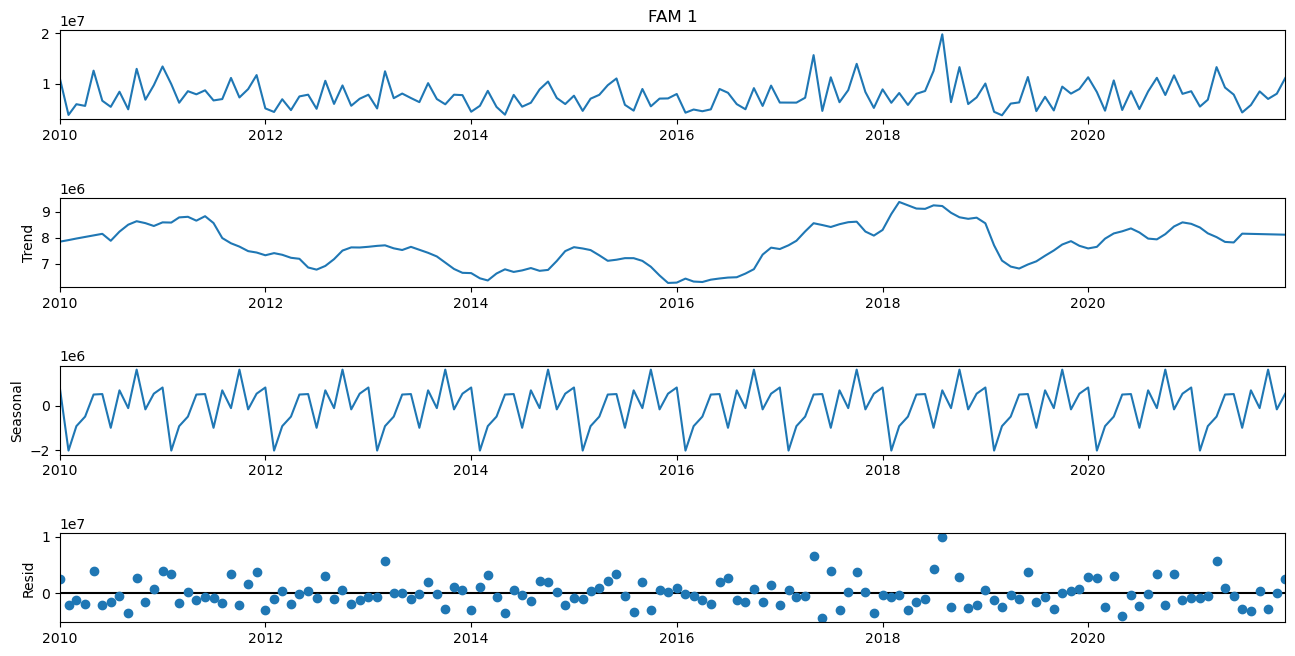

In [44]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    
seasonal_decompose (df["FAM 1"])

## Modéles de prédiction

### Autorégression (AR)

La méthode d'autorégression (AR) modélise l'étape suivante de la séquence comme une fonction linéaire des observations aux pas de temps précédents.

La notation du modèle implique de spécifier l'ordre du modèle p comme paramètre de la fonction AR, par exemple AR(p). Par exemple, AR(1) est un modèle d’autorégression du premier ordre.

La méthode convient aux séries chronologiques univariées sans composantes de tendance et saisonnières.

In [19]:
# afin de determiner les valeurs qui donnent le meilleur resultat pour chaque modéle [6,7,1,4,1,1]

lag_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]

best_mse = float("inf")
best_lag = None

for lag in lag_values:
    # Train the AR model
    model = AutoReg(df['FAM 1'][:132], lags=lag)
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.predict(start=len(df['FAM 1'][:132]), end=len(df['FAM 1'][:132])+11)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(df['FAM 1'][132:], predictions)
    
    # Check if this lag configuration gives a better result
    if mse < best_mse:
        best_mse = mse
        best_lag = lag

print("Best lag value:", best_lag)
print("Best MSE:", best_mse)

Best lag value: 6
Best MSE: 5430683628259.827


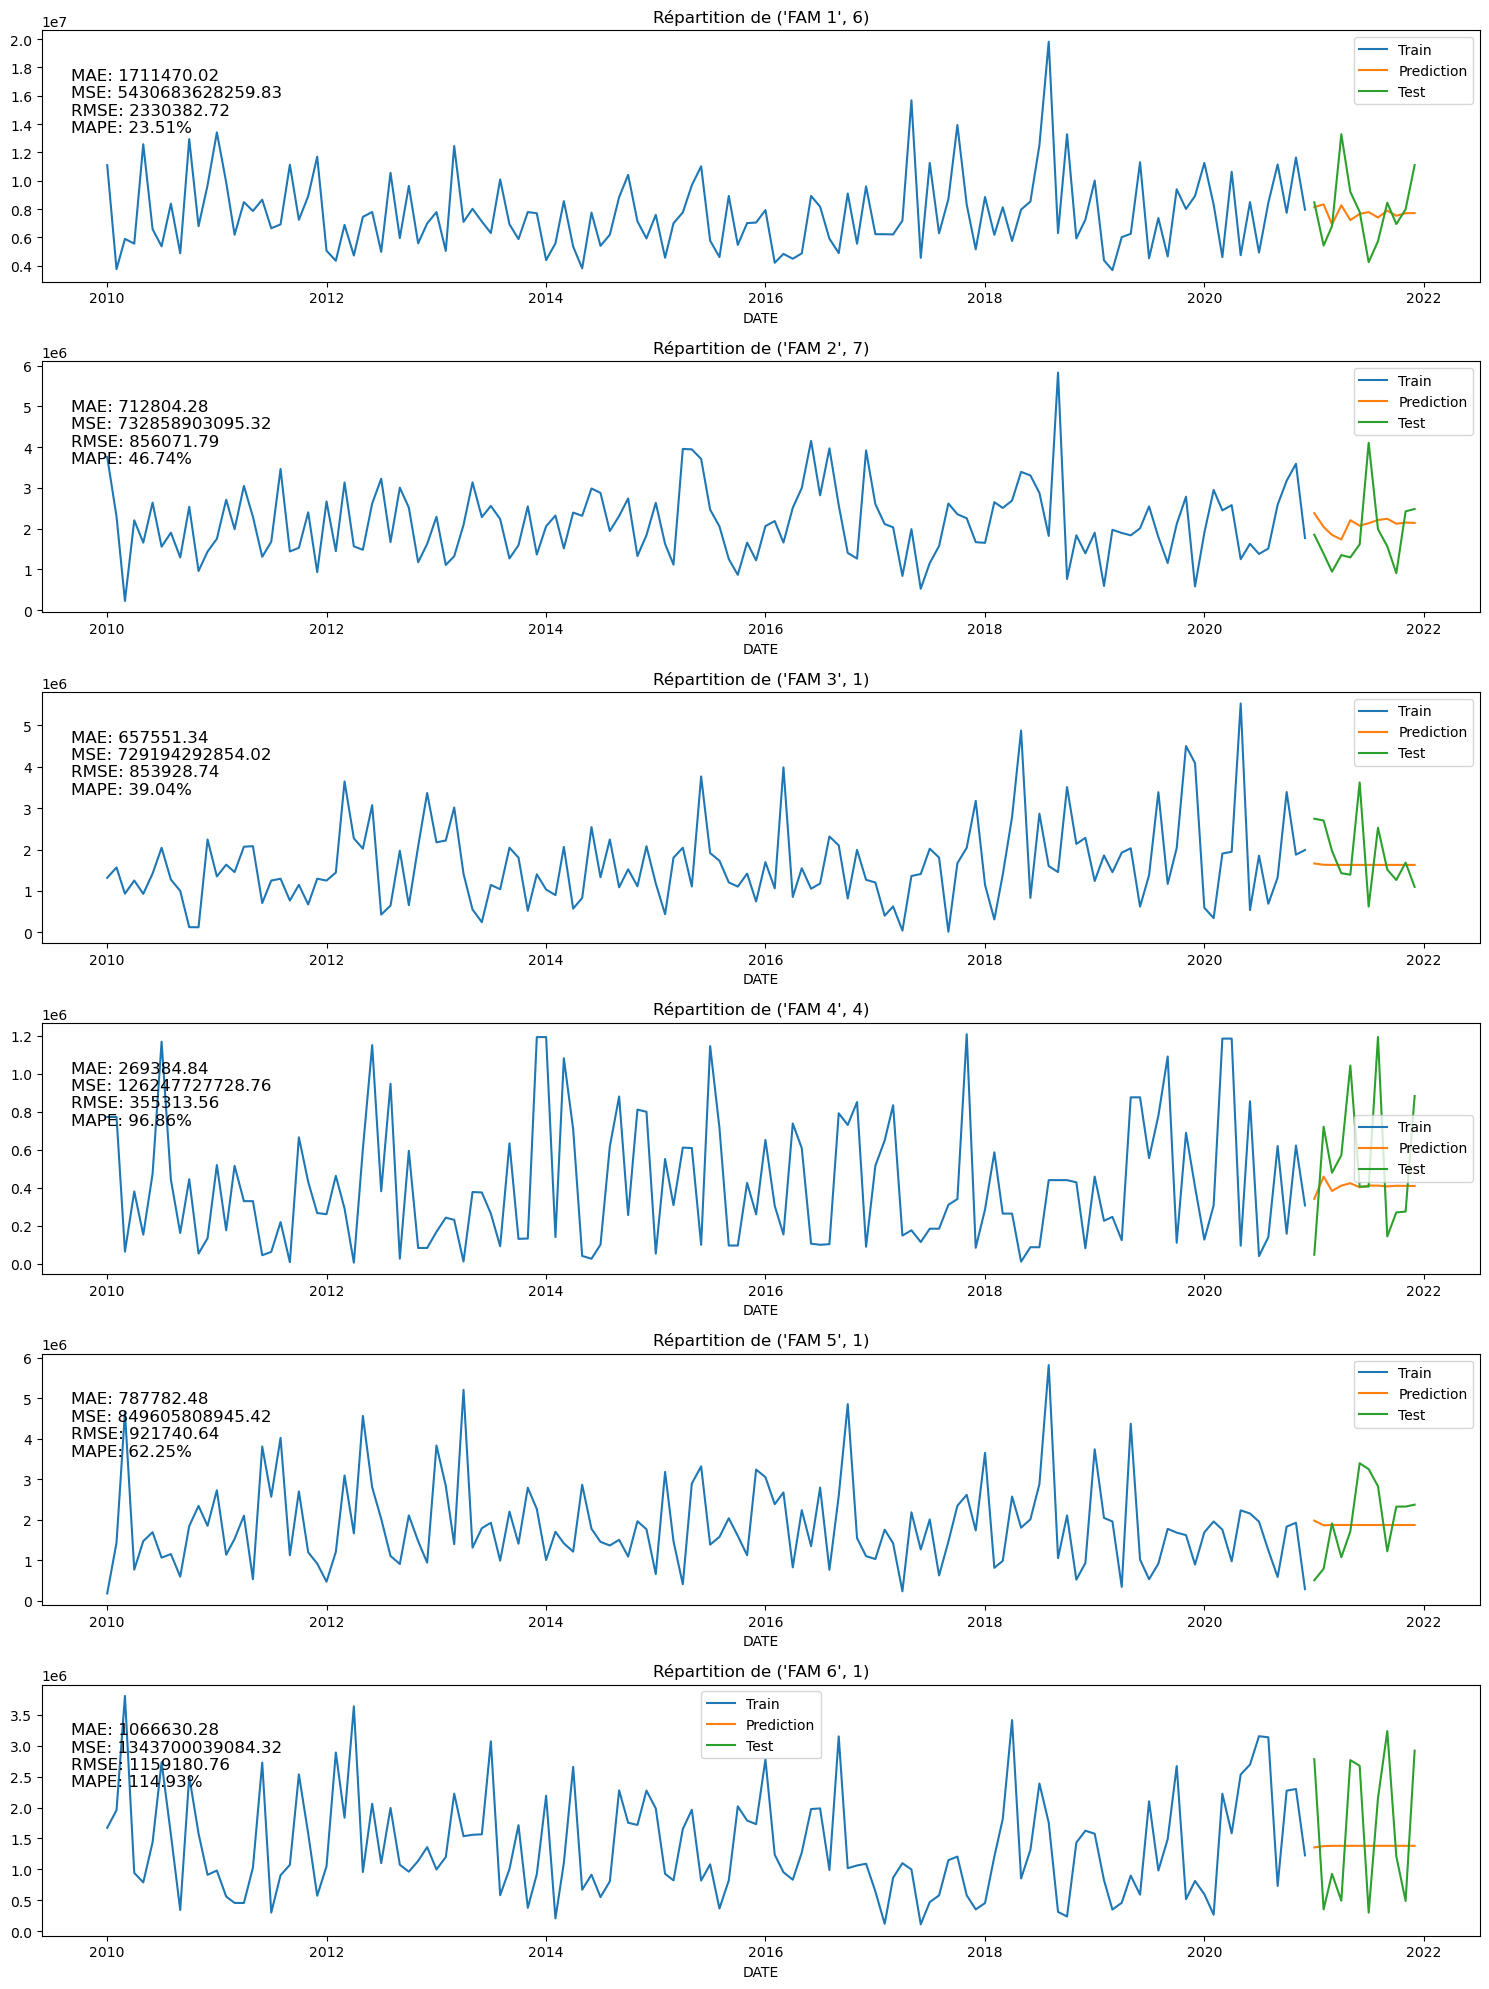

In [45]:
# Autorégression (AR)
from statsmodels.tsa.ar_model import AutoReg

variables = [('FAM 1', 6), ('FAM 2', 7), ('FAM 3', 1), ('FAM 4', 4), ('FAM 5', 1), ('FAM 6', 1)]

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable[0]}'][:132]
    test = df[f'{variable[0]}'][132:]
    
    # entrainement du modéle (AR)
    model = AutoReg(train, lags = variable[1])
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Moyenne mobile intégrée autorégressive (ARIMA)

La méthode ARIMA (Autoregressive Integrated Moving Average) modélise l'étape suivante de la séquence en tant que fonction linéaire des observations différenciées et des erreurs résiduelles aux pas de temps précédents.

Il combine à la fois des modèles d'autorégression (AR) et de moyenne mobile (MA) ainsi qu'une étape de prétraitement différencié de la séquence pour rendre la séquence stationnaire, appelée intégration (I).

La notation du modèle implique de spécifier l'ordre des modèles AR(p), I(d) et MA(q) comme paramètres d'une fonction ARIMA, par exemple ARIMA(p, d, q). Un modèle ARIMA peut également être utilisé pour développer des modèles AR, MA et ARMA.

La méthode convient aux séries chronologiques univariées avec tendance et sans composantes saisonnières.

In [ ]:
# Assuming you have 'train' and 'test' datasets
from itertools import product


# Define ranges for p, d, and q
p_range = range(0, 2)  # AR order
d_range = range(0, 2)  # Differencing order
q_range = range(0, 2)  # MA order

# Create a list of all possible parameter combinations
param_combinations = list(product(p_range, d_range, q_range))

best_aic = float("inf")
best_params = None

for params in param_combinations:
    try:
        model = ARIMA(df["FAM 1"][:132], order=params)
        model_fit = model.fit()
        
        # Calculate AIC on the test data
        predictions = model_fit.forecast(steps=len(df["FAM 1"][132:]))
        aic = mean_squared_error(df["FAM 1"][132:], predictions)
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except:
        continue

print("Best parameters:", best_params)
print("Best AIC:", best_aic)


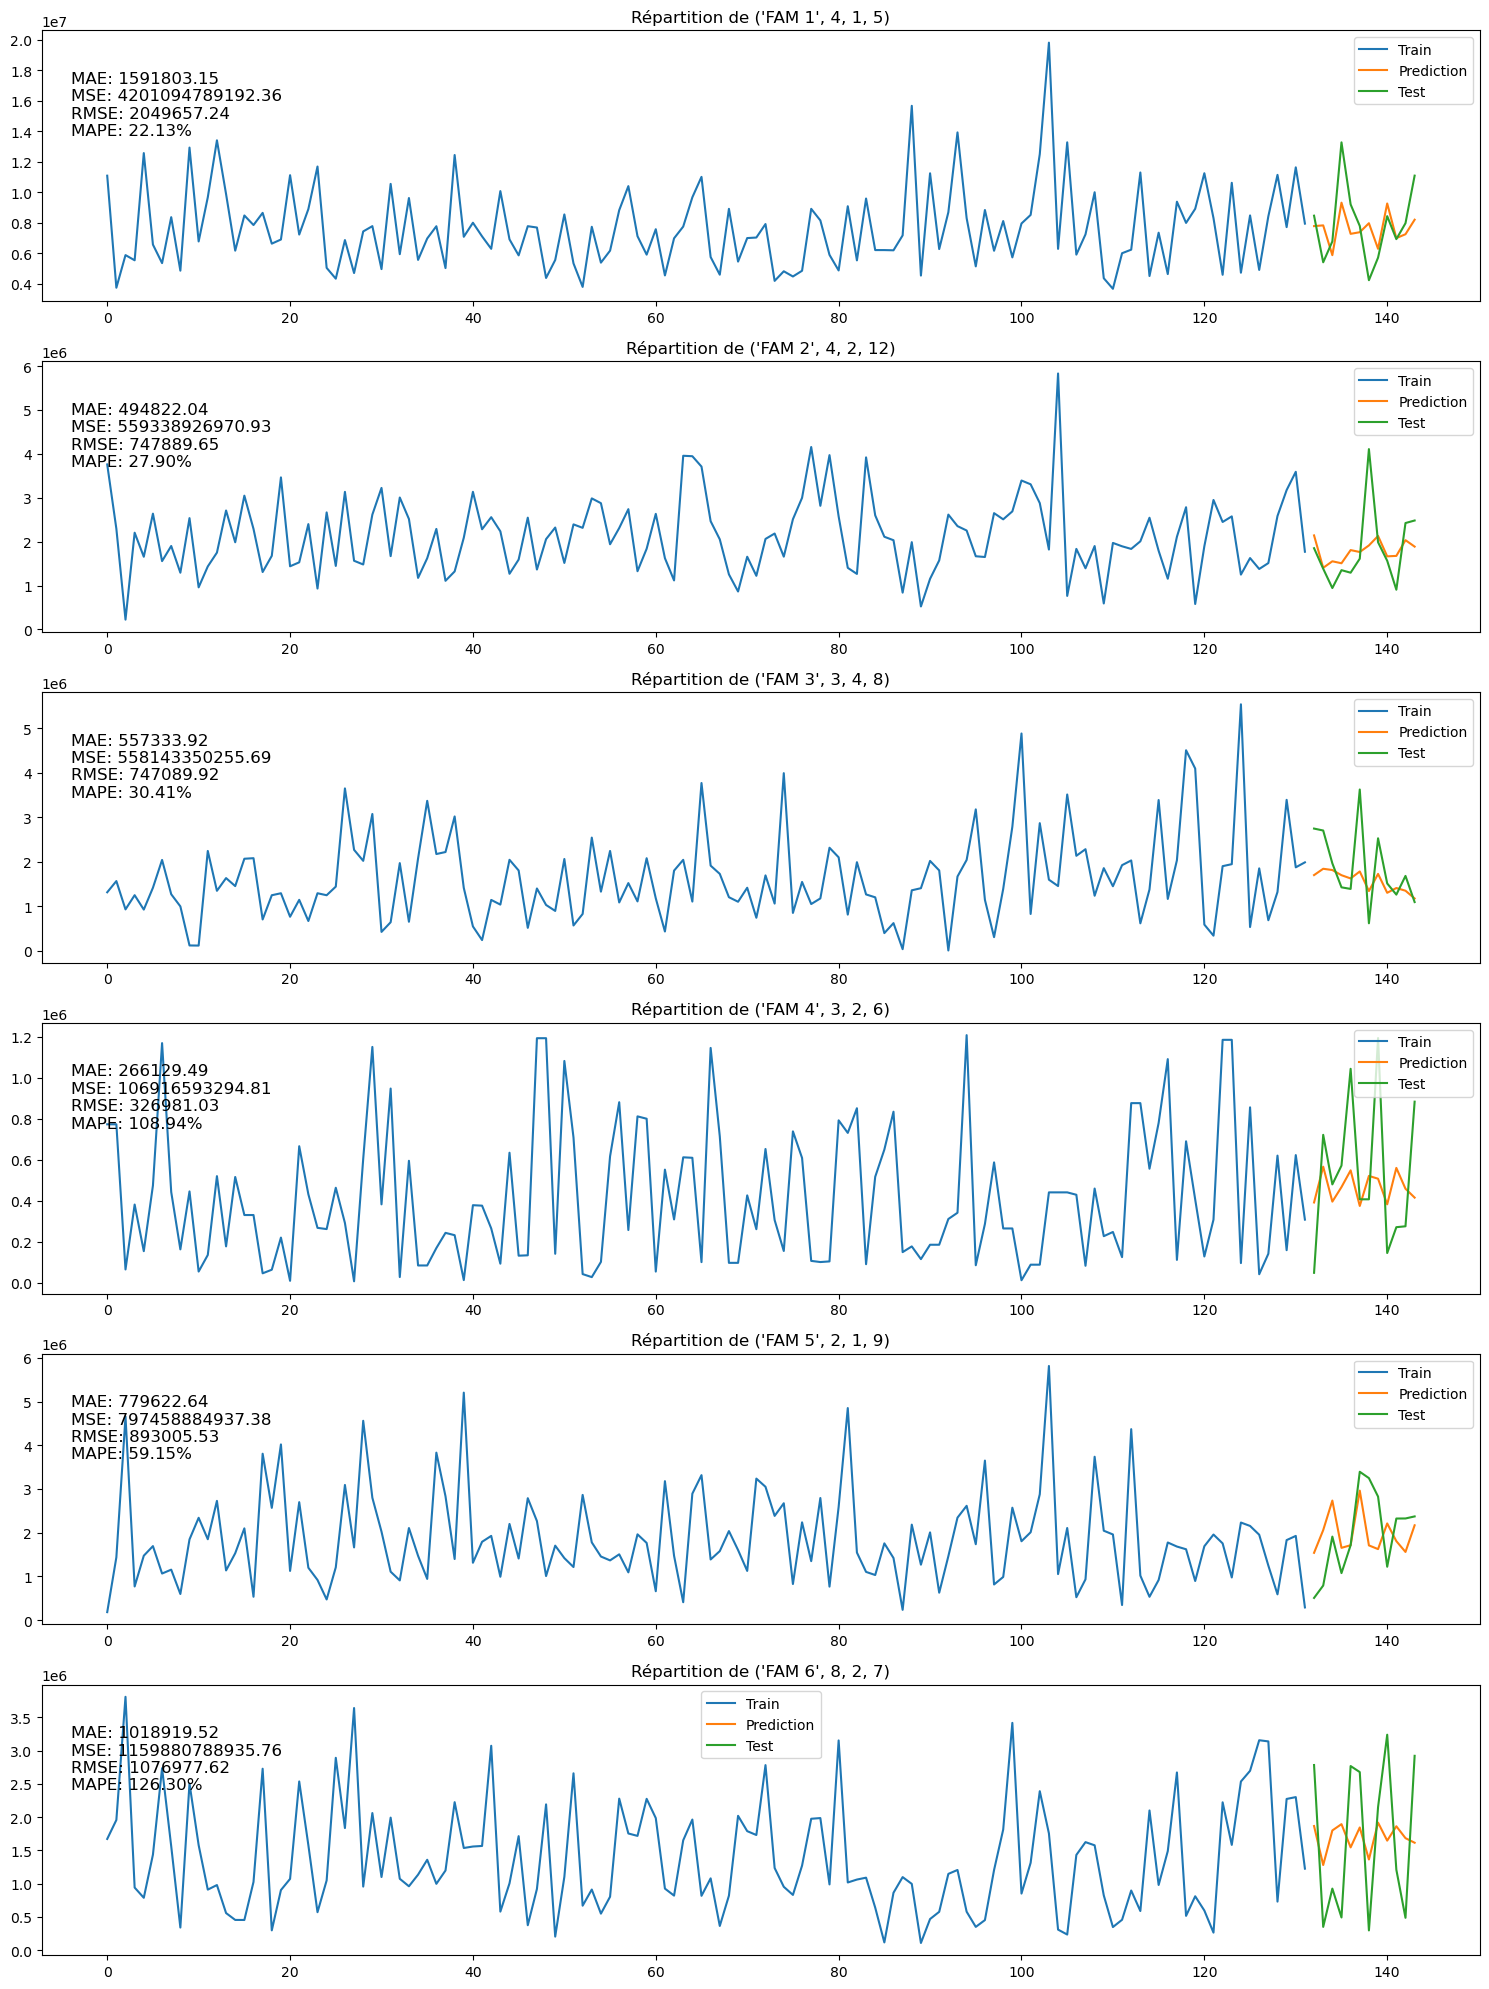

132    1.866650e+06
133    1.280439e+06
134    1.800242e+06
135    1.895042e+06
136    1.545457e+06
137    1.845163e+06
138    1.363600e+06
139    1.918124e+06
140    1.647169e+06
141    1.863082e+06
142    1.684370e+06
143    1.615716e+06
Name: predicted_mean, dtype: float64


In [120]:
# Autorégression (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

# variables = [('FAM 1',4,1,5), ('FAM 2',8,2,9), ('FAM 3',3,4,8),('FAM 4',3, 2, 6), ('FAM 5',2,1,9), ('FAM 6',8,2,7)]
variables = [('FAM 1',4,1,5), ('FAM 2',4, 2, 12), ('FAM 3',3,4,8),('FAM 4',3, 2, 6), ('FAM 5',2,1,9), ('FAM 6',8,2,7)]

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable[0]}'][:132]
    test = df[f'{variable[0]}'][132:]
    
    # entrainement du modéle (MA)
    model = ARIMA(train, order=(variable[1], variable[2], variable[3]))
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11,typ='levels')
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Lissage exponentiel de Holt Winter (HWES)

La méthode de lissage exponentiel de Holt Winter (HWES), également appelée méthode de lissage exponentiel triple, modélise le pas de temps suivant comme une fonction linéaire à pondération exponentielle des observations aux pas de temps précédents, en tenant compte des tendances et de la saisonnalité.

La méthode convient aux séries chronologiques univariées avec des composantes tendancielles et/ou saisonnières.

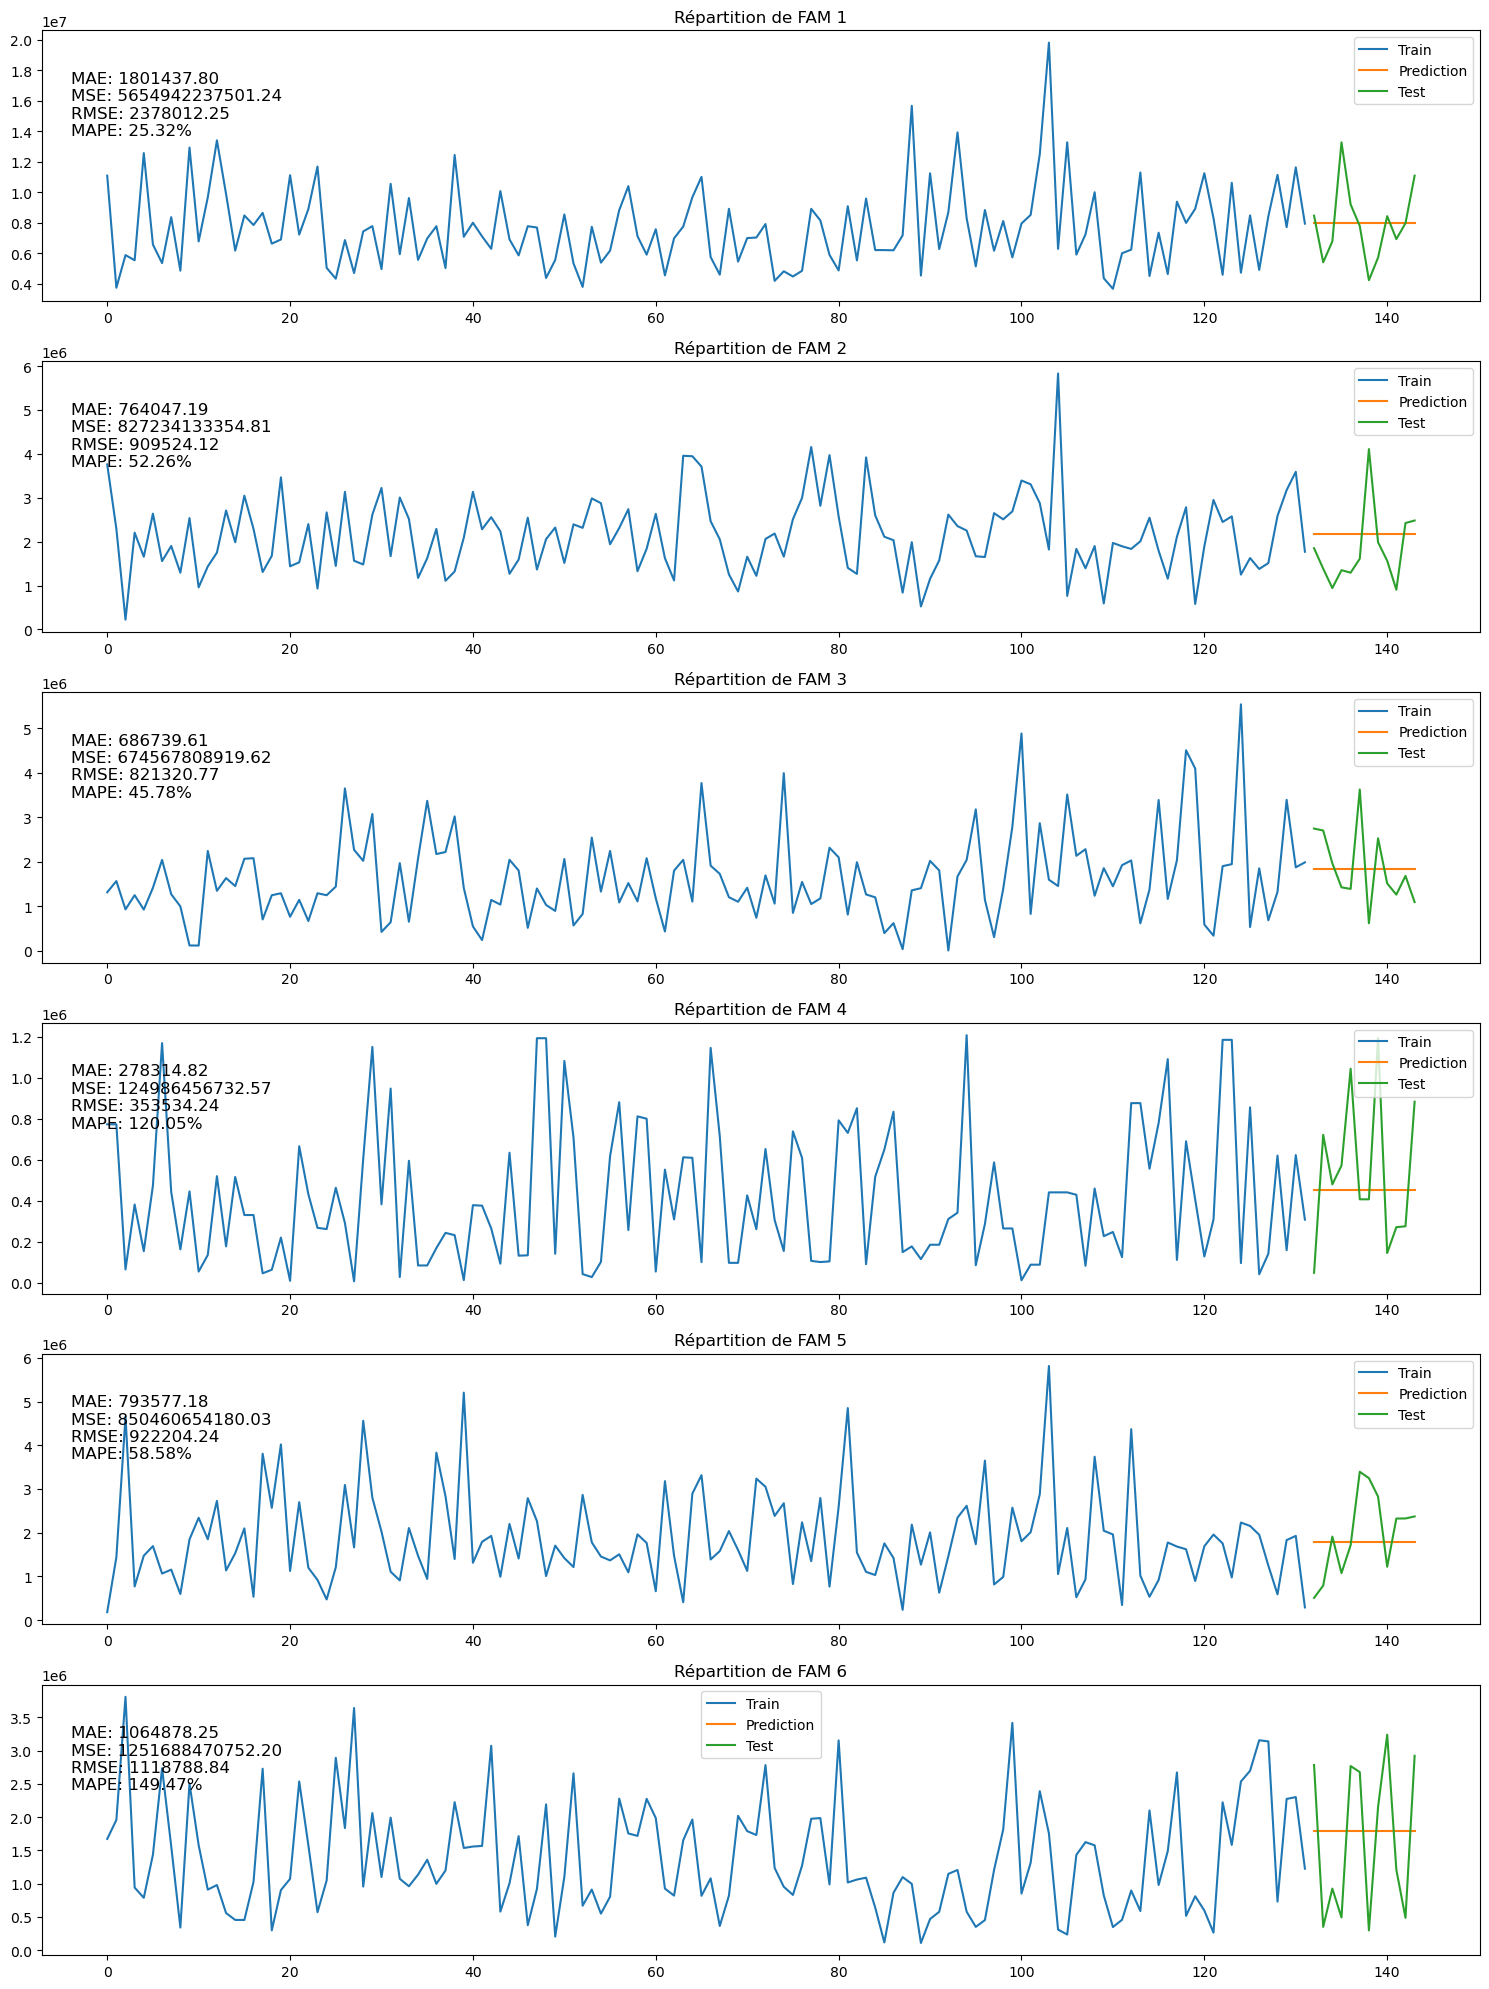

132    1.794732e+06
133    1.794732e+06
134    1.794732e+06
135    1.794732e+06
136    1.794732e+06
137    1.794732e+06
138    1.794732e+06
139    1.794732e+06
140    1.794732e+06
141    1.794732e+06
142    1.794732e+06
143    1.794732e+06
dtype: float64


In [121]:
# Autorégression (HWES)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle
    model = ExponentialSmoothing(train)
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()
print(prediction)

### Extreme Gradient Boosting XGBOOST

XGBoost, qui signifie "Extreme Gradient Boosting", est un algorithme d'apprentissage automatique puissant et populaire qui appartient à la famille des méthodes d'ensemble. Il a été conçu pour résoudre une grande variété de problèmes de classification, de régression et de classement, et il est devenu un choix privilégié parmi les data scientists et les chercheurs en machine learning.

L'essence même de XGBoost réside dans sa capacité à construire un modèle prédictif hautement performant en combinant plusieurs modèles simples, appelés "arbres de décision", de manière séquentielle. Chaque arbre est formé pour corriger les erreurs du précédent, ce qui permet au modèle global d'apprendre des relations complexes dans les données.

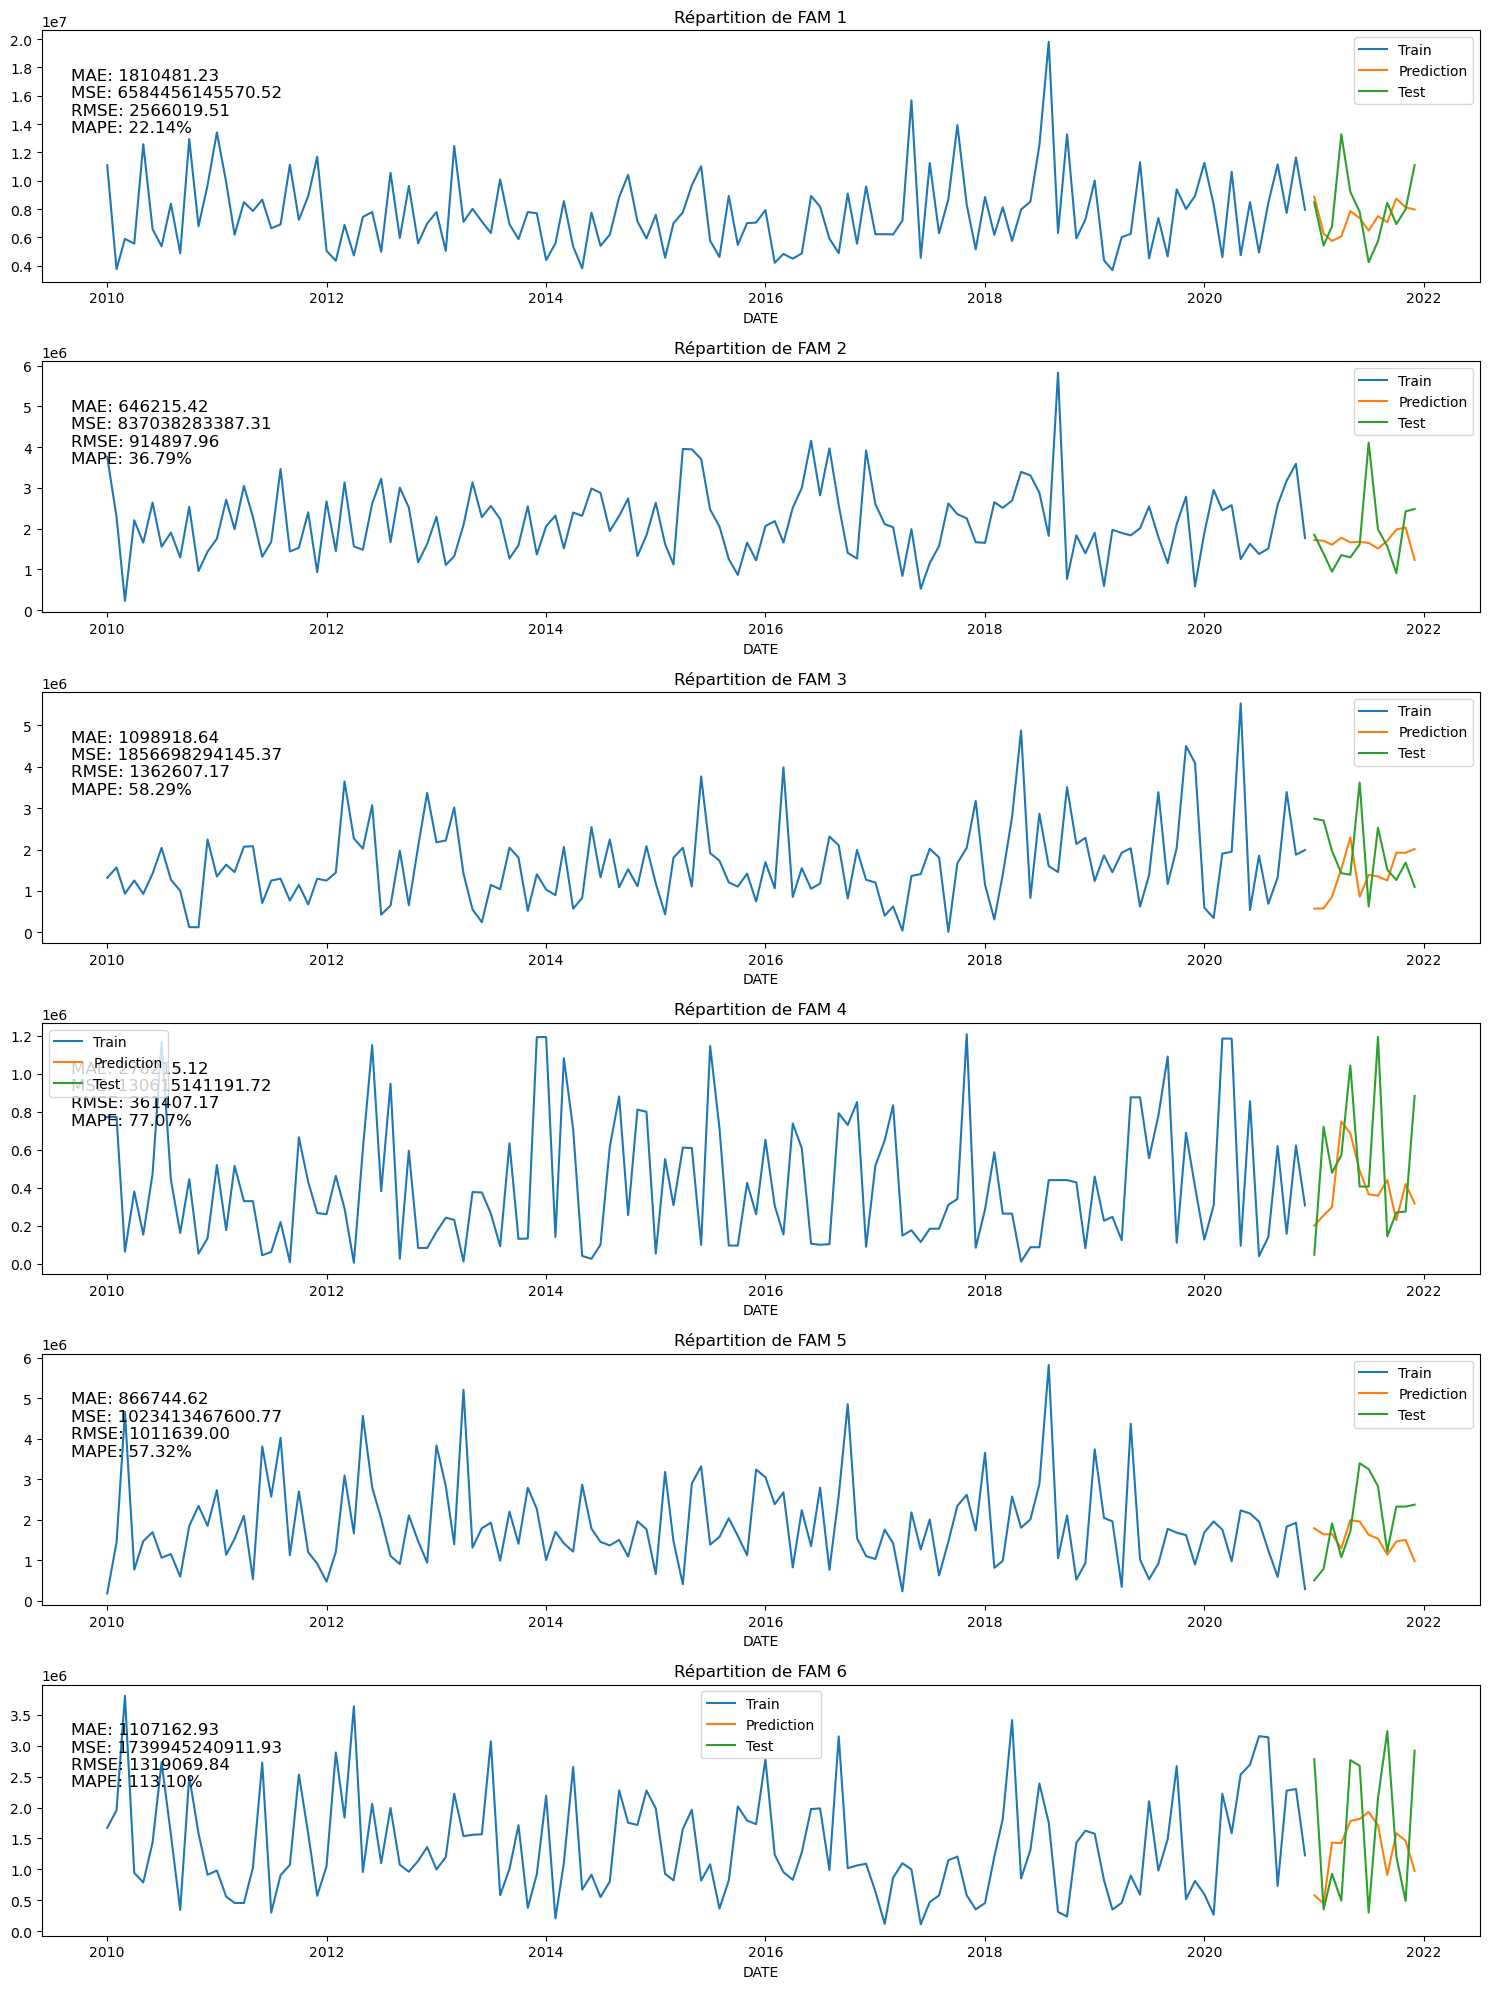

In [118]:
# xgboost
import xgboost as xgb
variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# features creation
xgb_data = df
xgb_data['DATE'] = pd.to_datetime(xgb_data['DATE'])
xgb_data['quarter'] = xgb_data['DATE'].dt.quarter
xgb_data['month'] = xgb_data['DATE'].dt.month
xgb_data['year'] = xgb_data['DATE'].dt.year
xgb_data['dayofyear'] = xgb_data['DATE'].dt.dayofyear
xgb_data['dayofmonth'] = xgb_data['DATE'].dt.day
xgb_data['is_weekend'] = (xgb_data['DATE'].dt.weekday >= 5).astype(int)

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    xgb_data['lag_1'] = xgb_data[f'{variable}'].shift(1)
    xgb_data['lag_2'] = xgb_data[f'{variable}'].shift(2)
    
    # train test split
    Xtrain = xgb_data[['quarter','month', 'year', 'dayofyear', 'dayofmonth','is_weekend']][:132]
    Ytrain = xgb_data[f'{variable}'][:132]
    
    Xtest = xgb_data[['quarter','month', 'year', 'dayofyear', 'dayofmonth','is_weekend']][132:]
    Ytest = xgb_data[f'{variable}'][132:]
    
    # entrainement du modéle
    model = xgb.XGBRegressor(base_score=0.1, booster='gbtree',    
                             n_estimators=1000,
                             early_stopping_rounds=200,
                             objective='reg:squarederror',
                             max_depth=5,
                             learning_rate=0.01,
                             colsample_bytree = 0.7,
                             gamma = 0.0,
                             min_child_weight = 1)
    
    model_fit = model.fit(Xtrain,Ytrain,eval_set=[(Xtrain, Ytrain), (Xtest, Ytest)],
            verbose=False)
    
    # prediction
    prediction = model.predict(Xtest)
    
    # traçage des courbes
    sns.lineplot(x=xgb_data['DATE'][:132],y=Ytrain.values, ax=axes[i],label='Train')
    sns.lineplot(x=xgb_data['DATE'][132:],y=prediction, ax=axes[i],label='Prediction')
    sns.lineplot(x=xgb_data['DATE'][132:],y=Ytest.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(Ytest, prediction)
    mse = mean_squared_error(Ytest, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((Ytest - prediction) / Ytest)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()